# Linear regression using Python Scikit Learn

(Level - Beginner)

* Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?
* Sample Solution : https://bit.ly/2HxiGGJ
* Task submission:
    1. Host the code on GitHub Repository (public). Record the code and output in a video. Post the video on YouTube
    2. Share links of code (GitHub) and video (YouTube) as a post on YOUR LinkedIn profile, not TSF Network.
    3. Submit the LinkedIn link in Task Submission Form when shared.
    
## Import data and libraries

In [1]:
# import all the library required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math  

The dataset can be found at http://bit.ly/w-data. Therefore, the first step is to read this dataset from the given link. Then show part of the dataset as the following: 

In [2]:
# import data from the link
link = "http://bit.ly/w-data"
score = pd.read_csv(link)

# show the dataset
score.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Prepare data by arranging the dataset into two sets:

* **X**: **Hours** as predictor 
* **y**: **Scores** as response variable

In [3]:
# split dataset using numpy.split 
X, y = np.split(score,[-1],axis=1)

## Linear Regression

To build a linear regression model, create two subsets from the data: 
* Training set 
* Testing set

After that fit model on training set and make prediction on the testing set. 
In order to split the data, import the train_test_split from sub-library ***model_selection*** of Sklearn.  

In [4]:
# create training and testing vars 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We can see that the ***test_size*** in the function is '0.30' indicating the percentage of data that is held for testing which means 70 percent for training and 30 percent for testing. Another parameter is ***random state*** controls the shuffling applied to the data before applying the split.

Linear regression presents the relationship between X and Y in the form of
$$Y = m * X + b$$
Next we will train the linear regression model using the training set.

In [6]:
# create linear regression object called 'regr'
regr = LinearRegression()

# train the model using the training sets
regr.fit(X_train, y_train)

# the coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[9.71054094]]
Intercept: 
 [2.79419668]


As you can see, slope (m) or coefficients and intercept (b) are as above. All together it represents a predicted line.
## Plot predicted line

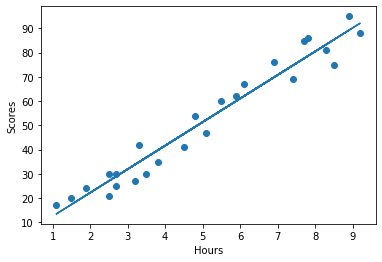

In [7]:
# plotting the regression line
line = regr.coef_ * X + regr.intercept_

## The line / model
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X, line);
plt.show()

From the figure, the actual data scatter around the line which is a good fit for the model.
## Make prediction
Now we will make prediction using testing set by feeding *X_test* into the trained model and compare the result with *y_test*

In [8]:
# make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([[83.39168645],
       [27.07054902],
       [27.07054902],
       [69.79692914],
       [60.0863882 ],
       [29.0126572 ],
       [34.83898177],
       [52.31795545]])

Compare the actual data and predicted data

In [9]:
# reset the index of testing set to combine in the dataframe
y_test = y_test.reset_index(drop=True)
y_pred = pd.DataFrame(y_pred, columns=["Predictions"])
# Place the DataFrames side by side
compare = pd.concat([y_test,y_pred], axis=1)
compare

,Scores,Predictions
0,81.0,83.391686
1,30.0,27.070549
2,21.0,27.070549
3,76.0,69.796929
4,62.0,60.086388
5,25.0,29.012657
6,42.0,34.838982
7,47.0,52.317955


It is time to predict a new data point given 9.25 hours per day 

In [10]:
# predict new data point using trained model
hours = 9.25
pred_score = regr.predict([[hours]])
print('The predicted score is', pred_score[0][0])

The predicted score is 92.61670033840096


## Measure the accuarcy
* MAE (Mean absolute error)
$$MAE = \frac{1}{N} \sum_{i=1}^n |y_i - \hat{y_i}|$$
* RMSE (Root mean square error)
$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^n {(y_i - \hat{y_i})}^2}$$

In [11]:
# calculate MAE and RMSE
print('Mean Absolute Error is',mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error is',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error is 4.499999999999998
Root Mean Square Error is 4.859985351228103


Conclusion
* There are some variation in the error as RMSE is more than MAE. 
* The average difference between predicted value and actual value is around 4.5 or MAE.
* Since the differences between MAE and RMSE is small, large errors are not likely to present.